In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
production = pd.read_csv('new.csv', index_col='Date',parse_dates = True)

In [3]:
production.head(45)

,Production
Date,
1979-01-01,93
1980-01-01,2692
1981-01-01,4585
1982-01-01,4874
1983-01-01,4370
1984-01-01,6228
1985-01-01,7116
1986-01-01,8935
1987-01-01,9062


In [4]:
production.isnull().value_counts()

Production
False         43
dtype: int64

In [5]:
print (production.dtypes)

Production    int64
dtype: object


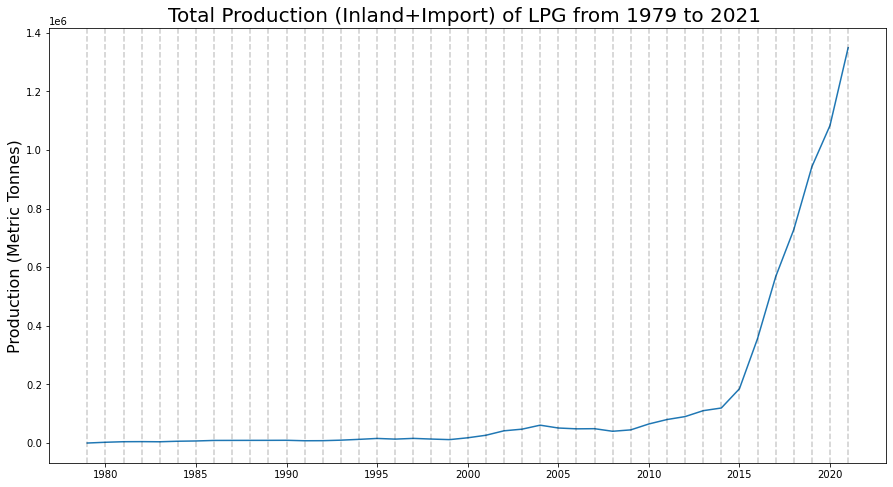

In [6]:
plt.figure(figsize=(15,8))
plt.plot(production.Production)
plt.title('Total Production (Inland+Import) of LPG from 1979 to 2021 ', fontsize=20)
plt.ylabel('Production (Metric Tonnes)', fontsize=16)
for year in range(1979,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

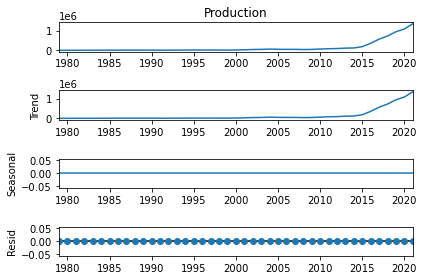

In [7]:
result = seasonal_decompose(production['Production'])
result.plot();

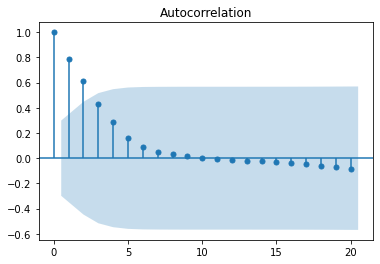

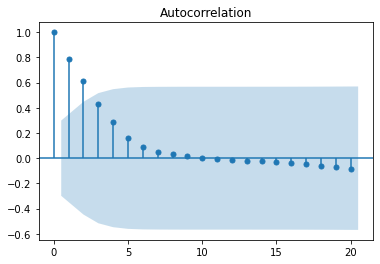

In [8]:
sm.graphics.tsa.plot_acf(production.values.squeeze(), lags=20)

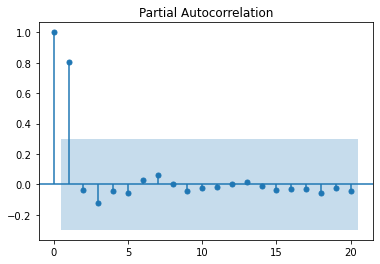

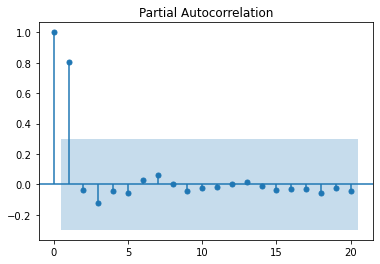

In [9]:
sm.graphics.tsa.plot_pacf(production.values.squeeze(), lags=20)

In [10]:
#Augmented Dickey Fuller Test

In [11]:
ADF = production.values
result = adfuller(ADF)
print('ADF Statistic: %f' % result[0])
print('P value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.710172
P value: 0.999087
Critical Values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [12]:
##Kwiatkowski Phillips Schmidt Shin (KPSS) Test

In [13]:
KPSS = production.values
result = kpss(KPSS)
print('KPSS Statistic: %f' % result[0])
print('P value: %f' % result[1])
print('Number of Lags: %f'% result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.399673
P value: 0.077296
Number of Lags: 10.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [14]:
##This is stationary because p value of KPSS is greater than .05

In [15]:
check_arima = auto_arima(production['Production'], trace = True,suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=971.553, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=971.212, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=970.413, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=971.797, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=968.829, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=968.877, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=968.094, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=969.314, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=972.100, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=968.090, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=971.755, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=970.023, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=969.244, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=969.839, 

In [16]:
check_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -480.045
Date:                Fri, 14 Oct 2022   AIC                            968.090
Time:                        22:38:29   BIC                            974.944
Sample:                             0   HQIC                           970.586
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8013.3173   9292.300      0.862      0.388   -1.02e+04    2.62e+04
ar.L1         -0.9995      0.308     -3.250      0.001      -1.602      -0.397
ma.L1          0.6303      0.381      1.656      0.098      -0.116       1.376
sigma2      9.066e+08      0.488   1.86e+09      0.000    9.07e+08    9.07e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               106.02
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              94.83   Skew:                             2.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+24. Standard errors may be unstable.
"""

In [17]:
model = ARIMA(production, order=(1,2,1))
fitted = model.fit()

In [18]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:             Production   No. Observations:                   43
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -481.047
Date:                Fri, 14 Oct 2022   AIC                            968.094
Time:                        22:38:29   BIC                            973.235
Sample:                    01-01-1979   HQIC                           969.966
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      0.265     -3.780      0.000      -1.518      -0.481
ma.L1          0.6435      0.310      2.079      0.038       0.037       1.250
sigma2      9.719e+08   6.85e-10   1.42e+18      0.0

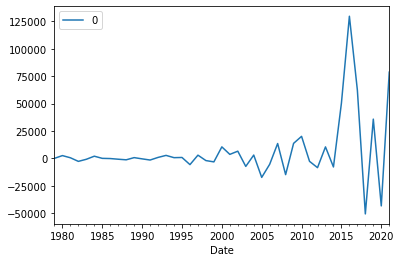

In [19]:
residuals = DataFrame(fitted.resid)
residuals.plot()
plt.show()

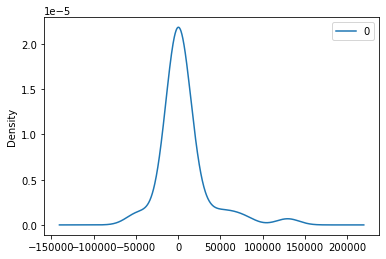

In [20]:
residuals.plot(kind='kde')
plt.show()

In [21]:
print(residuals.describe())

                   0
count      43.000000
mean     6467.712273
std     28951.917017
min    -50547.364413
25%     -2652.313446
50%       617.500489
75%      5165.050175
max    129584.707553


In [22]:
new = production.values
size = int(len(new) * 0.66)
train, test = new[0:size], new[size:len(new)]
history = [x for x in train]
predictions = list()

In [23]:
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    fitted = model.fit()
    output = fitted.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%.2f, expected=%.2f' % (yhat, obs))
    #print(output)

predicted=35943.05, expected=49038.00
predicted=48209.70, expected=40222.00
predicted=36338.02, expected=44974.00
predicted=41708.08, expected=65150.00
predicted=72268.65, expected=80228.00
predicted=87931.87, expected=90306.00
predicted=96207.96, expected=110507.00
predicted=124048.54, expected=119610.00
predicted=127522.76, expected=185220.00
predicted=210376.13, expected=356346.00
predicted=627153.41, expected=567682.00
predicted=780120.04, expected=728372.00
predicted=855007.82, expected=943006.00
predicted=1189869.50, expected=1083514.00
predicted=1222547.91, expected=1348968.00


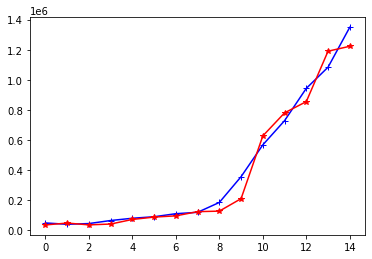

In [24]:
plt.plot(test, color ='blue', marker= '+')
plt.plot(predictions, color='red', marker = '*')
plt.show()

In [25]:
fitted.predict(43,50, exog=None, dynamic=False)

array([1361059.56187828, 1499386.18229815, 1637647.24756601,
       1775885.08719024, 1914114.69816264, 2052341.39379232,
       2190567.05654039, 2328792.35334712])

In [26]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 66853.387
